# Introduction
This is a jupyter notebook which contains code for the artificial intelligence course for leaders. A Jupyter notebook is a series of cells which can be executed such that the code in them is run. In this course we will explore a data set by plotting with matplotlib. Predictive supervised models will be built, first regression models, then an artificial neural network. 

# Import Libraries
Import all the libraries we need to run the code and perform the analysis. 

In [68]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
%load_ext autoreload
%autoreload 2
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Dataset

In [2]:
housing_df = pd.read_csv('data/melbourne-housing-market/Melbourne_housing_FULL.csv')
housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


# Remove Outliers

In [3]:
# Clip outliers
housing_df['BuildingArea'] = housing_df['BuildingArea'].clip(0,500)
housing_df['Price'] = housing_df['Price'].clip(0,4000000)

# Plot Histograms of Different Variables

Text(0.5,1,'Histogram of Building Areas')

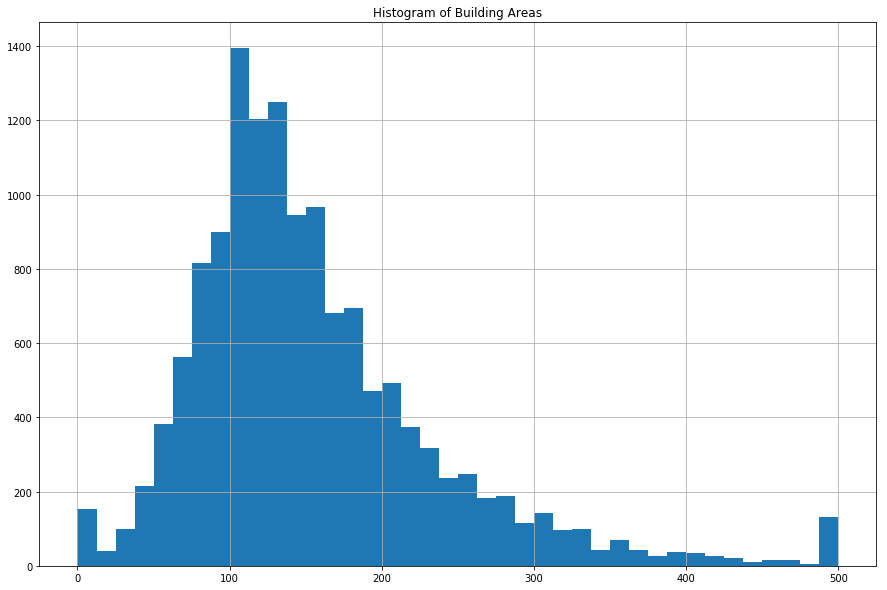

In [25]:
housing_df['BuildingArea'].hist(bins=40, figsize=(15,10))
plt.title('Histogram of Building Areas')

### Assignment 1: Create a histogram of Price in the following cell

In [27]:
#housing_df['Price'].hist(bins=40, figsize=(15,10))
#plt.title('Histogram of Price')

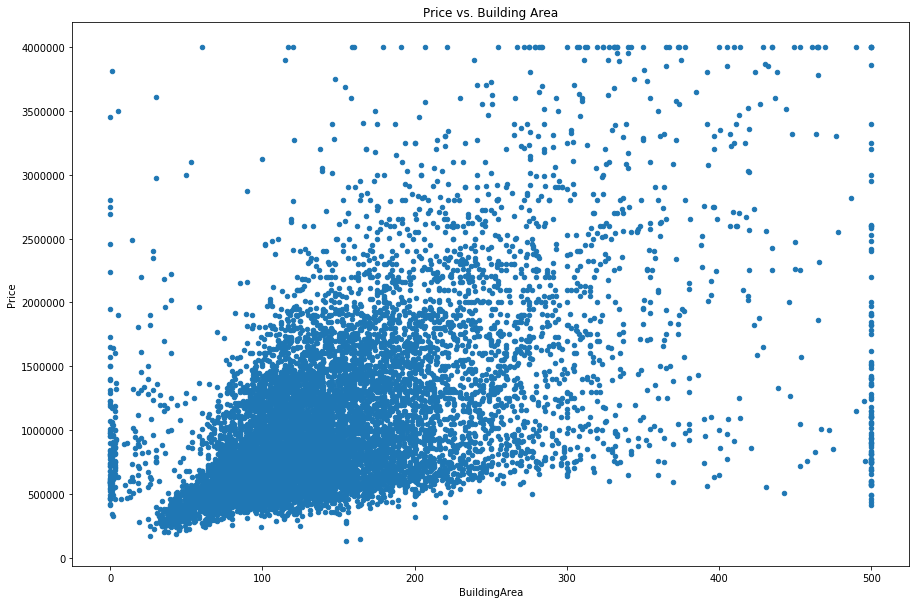

In [28]:
# See that the data is heteroscedastic, changing variance. 
housing_df.plot.scatter('BuildingArea', 'Price', figsize=(15,10), title='Price vs. Building Area')
#housing_df[housing_df['CouncilArea'] == 'Yarra City Council'].plot.scatter('BuildingArea', 'Price', figsize=(15,10), title='Price vs. Building Area in One Area')

### Question 1: Do you think a simple linear model with BuildingArea as input will be a good model for predicting price?

In [6]:
print(housing_df['Suburb'].nunique())
print(housing_df['CouncilArea'].nunique())
print(housing_df['Regionname'].nunique())

351
33
8


# Simple One Dimensional Linear Regression

We'll start of by looking at a subset of the housing data, only in the council area of Yarra.
The goal is to find all of the weights, $w_i$, in the following linear regression model. 
$y = w_0 + w_1x_1$


[10791.04015156]
Mean Error: 252395.4696137029


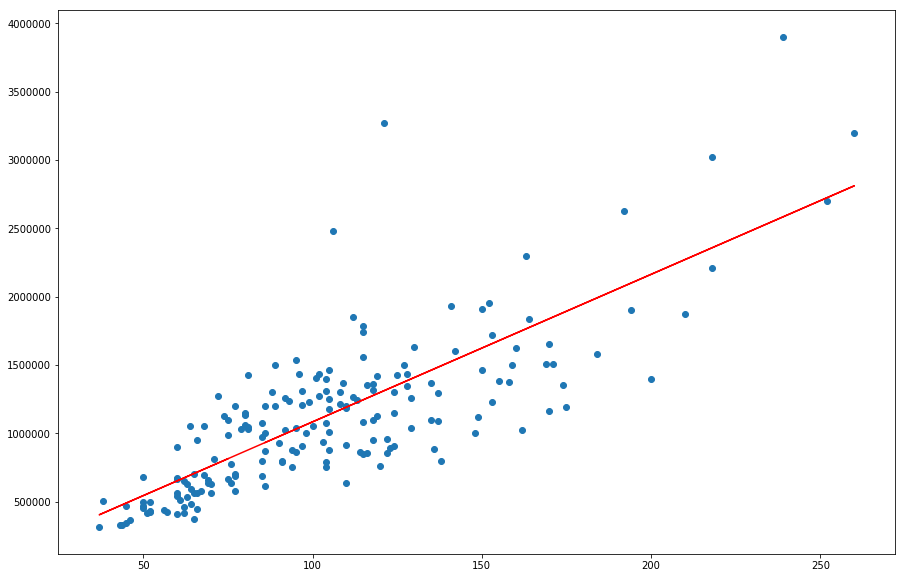

In [35]:
# Get a subset of data
housing_small_df = housing_df[housing_df['CouncilArea'] == 'Yarra City Council']

# Remove nan
housing_small_df = housing_small_df[pd.notnull(housing_small_df['Price'])]
housing_small_df = housing_small_df[pd.notnull(housing_small_df['BuildingArea'])]

# Remove outliers 
housing_small_df = housing_small_df[housing_small_df['BuildingArea'] > 30]

# Set up input and output variables
y = housing_small_df['Price']
x = housing_small_df[['BuildingArea']]

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print(regr.coef_)

# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
print('Mean Error: ' + str(mean_error))

# Plot results
plt.figure(figsize=(15,10));
plt.plot(x_test, y_pred, 'r');
plt.scatter(x_test, y_test);

# Multi-Dimensional Linear Regression
In order to increase the predictive power, i.e. to get a more accurate model, more information can be added to the model. One way of doing that is by adding more input variables to the model. Variables that could be tried are BuildingArea, Rooms, LandSize, Car. <br><br>
$y = w_0 + w_1x_1 + w_2x_2 + \dots$<br>

In [42]:
housing_small_df['Car'] = housing_small_df['Car'].fillna(0.0)
housing_small_df['Landsize'] = housing_small_df['Landsize'].fillna(0.0).clip(0,1000)
#housing_small_df['Landsize'] = housing_df['Landsize'].clip(0,1000)
x = housing_small_df[['BuildingArea', 'Rooms', 'Landsize', 'Car']]
y = housing_small_df['Price']

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print('Regression Coefficients')
print(regr.coef_)

# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
print('Mean Error: ' + str(mean_error))

Regression Coefficients
[ 8.33638807e+03  2.19643982e+05 -3.98030797e+01 -4.67671800e+04]
Mean Error: 237115.5834464449


# Neural Network

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

# generate regression dataset
#X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

x = housing_small_df[['BuildingArea', 'Rooms', 'Landsize', 'Car']]
y = housing_small_df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(len(y_train),1))
y_test = scaler.transform(y_test.values.reshape(len(y_test),1))

#X = scalarX.transform(X)
#y = scalarY.transform(y.reshape(100,1))
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=100, verbose=0)

# new instances where we do not know the answer
#Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
#Xnew = scalarX.transform(Xnew)
# make a prediction

y_pred = model.predict(x_test)[:,0]
# show the inputs and predicted outputs

y_pred = scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test = scaler.inverse_transform(y_test)

# Evaluate Results
mean_error = (pd.Series(y_pred[:,0]) - y_test[:,0]).abs().mean()
print('Mean Error: ' + str(mean_error))

Mean Error: 201810.80548128343


In [ ]:
237115.5834464449 - 1156370.4492285417

In [70]:
x_train

array([[0.2005988 , 0.25      , 0.        , 0.        ],
       [0.66467066, 1.        , 0.618     , 1.        ],
       [0.04491018, 0.        , 0.816     , 0.33333333],
       [0.25748503, 0.25      , 0.        , 0.66666667],
       [0.37125749, 0.25      , 0.108     , 0.33333333],
       [0.36227545, 0.5       , 0.        , 0.66666667],
       [0.0508982 , 0.        , 0.        , 0.33333333],
       [0.45508982, 0.5       , 0.        , 0.33333333],
       [0.23053892, 0.5       , 1.        , 0.33333333],
       [0.0988024 , 0.25      , 0.        , 0.66666667],
       [0.37724551, 0.5       , 0.093     , 0.33333333],
       [0.1497006 , 0.25      , 0.151     , 0.        ],
       [0.11077844, 0.25      , 0.        , 0.66666667],
       [0.04491018, 0.        , 1.        , 0.33333333],
       [0.31736527, 0.25      , 0.        , 0.33333333],
       [0.43712575, 0.5       , 0.119     , 0.66666667],
       [0.25748503, 0.5       , 0.168     , 0.33333333],
       [0.51497006, 0.5       ,